In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly.express


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.subplots as sp
from plotly.subplots import make_subplots

# To get graphs from library go on github:
import plotly.io as pio
from IPython.display import Image


In [9]:
delay_df = pd.read_excel("/Users/kechok/Documents/Data_project/Bloc_5_PROJECT_GetAround-main/GetAround/EDA/get_around_delay_analysis.xlsx",sheet_name='rentals_data')
delay_df.head(50)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,532240,379042,mobile,ended,71084.0,NaN,NaN
1,549980,402829,mobile,ended,64059.0,NaN,NaN
2,537546,408750,mobile,ended,37382.0,NaN,NaN
3,534699,270195,mobile,ended,23126.0,NaN,NaN
4,556557,413591,mobile,ended,22618.0,NaN,NaN
5,540733,393558,mobile,ended,15422.0,NaN,NaN
6,554989,366198,mobile,ended,14408.0,NaN,NaN
7,552196,278701,mobile,ended,13463.0,NaN,NaN
8,546459,297511,mobile,ended,12968.0,NaN,NaN
9,539642,396000,mobile,ended,10323.0,NaN,NaN


In [10]:
delay_doc = pd.read_excel('/Users/kechok/Documents/Data_project/Bloc_5_PROJECT_GetAround-main/GetAround/EDA/get_around_delay_analysis.xlsx',sheet_name='Documentation')
pd.set_option('display.max_colwidth',None)
display(delay_doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


# EDA DELAY #

In [11]:
delay_df.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [12]:
print(len(delay_df['checkin_type']))

21310


In [13]:
print(delay_df.isnull().sum())
print(f"number of canceled runs {len(delay_df[delay_df['state']=='canceled'])}")
print("We need to remove the cancelled runs and the missing values for the delay at check out. Furthermore, when the car is available in advance, there is no interest in our analysis.")

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64
number of canceled runs 3265
We need to remove the cancelled runs and the missing values for the delay at check out. Furthermore, when the car is available in advance, there is no interest in our analysis.


In [14]:
print(f"Number of run that ended {delay_df['state'].str.count('ended').sum()}.")
print(f"Number of cancelled rides {delay_df['state'].str.count('canceled').sum()}")

Number of run that ended 18045.
Number of cancelled rides 3265


In [15]:
#We will get rid of the missing values for the delay check out and the column state . Finally we will only the positive delays.
delay_cleaned_df= delay_df.dropna(subset=['delay_at_checkout_in_minutes'])
print(f"Number of canceled rides {delay_cleaned_df['state'].str.count('canceled').sum()} which is not relevant. We will remove the column state")
delay_cleaned_df=delay_cleaned_df.drop(columns="state")
positive_delay_cleaned_df=delay_cleaned_df[delay_cleaned_df['delay_at_checkout_in_minutes']>0]

Number of canceled rides 1 which is not relevant. We will remove the column state


In [16]:
print(delay_df.shape,delay_cleaned_df.shape,positive_delay_cleaned_df.shape)
print("After cleaning and filtered the important information we end up with a dataframe's shape of (9404,6) ")

(21310, 7) (16346, 6) (9404, 6)
After cleaning and filtered the important information we end up with a dataframe's shape of (9404,6) 


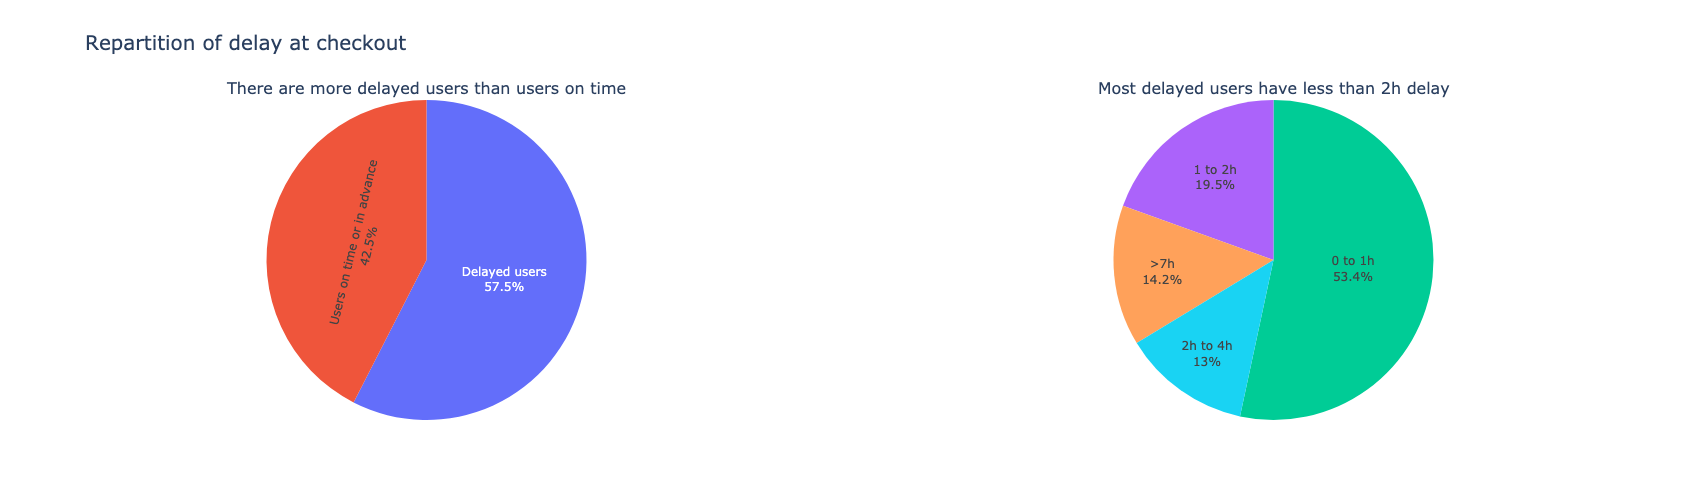

In [17]:
# All users
bins = [-float('inf'), 0, float('inf')]
labels = ['Users on time or in advance', 'Delayed users']
delay_bins = pd.cut(delay_df.delay_at_checkout_in_minutes, bins=bins, labels=labels)
section_counts = delay_bins.value_counts()

# Positive delays only
bins = [0, 60, 120, 240, float('inf')]
labels = ['0 to 1h', '1 to 2h', '2h to 4h','>7h']
delay_bins_positive = pd.cut(positive_delay_cleaned_df.delay_at_checkout_in_minutes, bins=bins, labels=labels)
section_counts_positive = delay_bins_positive.value_counts()

# Subplots & graphs
specs = [[{'type': 'domain'}, {'type': 'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=['There are more delayed users than users on time','Most delayed users have less than 2h delay'])
fig.add_trace(go.Pie(labels=section_counts.index, values=section_counts, textinfo='label+percent'),row=1, col=1)
fig.add_trace(go.Pie(labels=section_counts_positive.index, values=section_counts_positive, textinfo='label+percent'),row=1, col=2)
fig.update_layout(title='Repartition of delay at checkout', title_font=dict(size=20), showlegend=False)
# fig.show()

fig.update_layout(width=1700,height=500)
# Save the figure as a static image in order to see it in github
pio.write_image(fig, 'EDA_Go_graphs/Repartition of delay at checkout.png')
Image(filename='EDA_Go_graphs/Repartition of delay at checkout.png')

In [18]:
mean_all_delay=round(delay_df['delay_at_checkout_in_minutes'].mean())
mean_positive_delay=round(positive_delay_cleaned_df['delay_at_checkout_in_minutes'].mean())
median_positive_delay=round(positive_delay_cleaned_df['delay_at_checkout_in_minutes'].median())
print(f"Considering all the data, the average delay is {mean_all_delay}min.\nAfter cleaning and selecting the relevant data, we realized that the average 'positive delay' is {mean_positive_delay}h ({round(mean_positive_delay/60)}h) and the median is {median_positive_delay}h.\nThus,the target as been set and we need to reduce the average positive delay and the median in the following analysis")

Considering all the data, the average delay is 60min.
After cleaning and selecting the relevant data, we realized that the average 'positive delay' is 202h (3h) and the median is 53h.
Thus,the target as been set and we need to reduce the average positive delay and the median in the following analysis


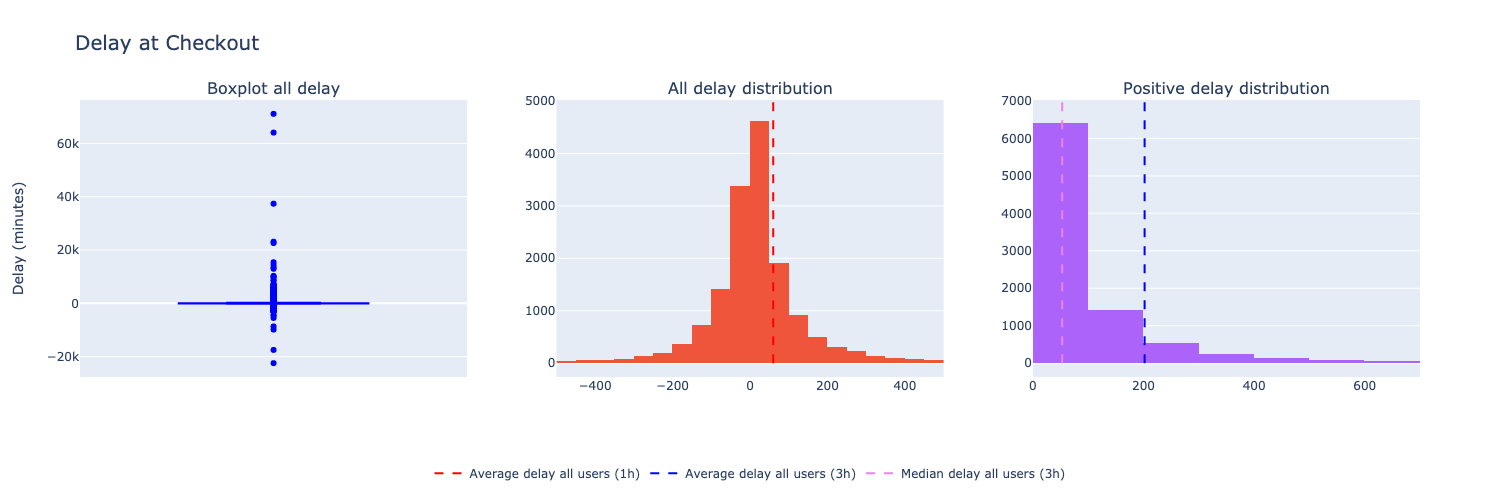

In [19]:
fig = sp.make_subplots(rows=1,cols=3,subplot_titles=("Boxplot all delay","All delay distribution", "Positive delay distribution"))

# Boxplot delay
boxplot = go.Box(y=delay_df['delay_at_checkout_in_minutes'],showlegend=False, marker=dict(color='blue'), name='')
fig.add_trace(boxplot, row=1, col=1)
fig.update_yaxes(title_text="Delay (minutes)", row=1, col=1)

#All data delay representation
fig.add_trace(go.Histogram(x=delay_df['delay_at_checkout_in_minutes'],showlegend=False),row=1,col=2)
fig.update_xaxes(range=[-500,500],row=1,col=2)
fig.add_shape(type="line",x0=mean_all_delay,y0=0,x1=mean_all_delay,y1=5000,line=dict(color="red", width=2, dash="dash"),row=1,col=2)
fig.add_trace(go.Scatter(x=[mean_all_delay], y=[0], mode="lines", name="Average delay all users (1h)", line=dict(color="red", width=2, dash="dash")), row=1, col=2)

#Positive delay
fig.add_trace(go.Histogram(x=positive_delay_cleaned_df['delay_at_checkout_in_minutes'],showlegend=False),row=1,col=3)
fig.update_xaxes(range=[0,700],row=1,col=3)
fig.add_trace(go.Scatter(x=[mean_positive_delay], y=[0], mode="lines", name="Average delay all users (3h)", line=dict(color="blue", width=2, dash="dash")), row=1, col=3)
fig.add_shape(type="line",x0=mean_positive_delay,y0=0,x1=mean_positive_delay,y1=7000,line=dict(color="blue", width=2, dash="dash"),row=1,col=3)

fig.add_trace(go.Scatter(x=[median_positive_delay], y=[0], mode="lines", name="Median delay all users (3h)", line=dict(color="violet", width=2, dash="dash")), row=1, col=3)
fig.add_shape(type="line",x0=median_positive_delay,y0=0,x1=median_positive_delay,y1=7000,line=dict(color="violet", width=2, dash="dash"),row=1,col=3)

# Layout
fig.update_layout(title="Delay at Checkout",title_font=dict(size=20),legend=dict(orientation="h", yanchor="bottom", y=-0.4, xanchor="center", x=0.5),width=1500)


# Save the figure as a static image in order to see it in github
pio.write_image(fig, 'EDA_Go_graphs/Repartition of delay at checkout.png')
Image(filename='EDA_Go_graphs/Repartition of delay at checkout.png')


## Threshold analysis ##

In [20]:
display(delay_doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


In [21]:
delay_df['time_delta_with_previous_rental_in_minutes'].isnull().sum()

19469

#### According to the description: ####

delay_at_checkout_in_minutes = Real time check out - Rental request end time

time_delta_with_previous_rental_in_minutes = Requested start time - real time check out from previous drive

In [22]:

# Creating and cleaning new daataframe for threshold analysis
expected_threshold_all_df=delay_df.dropna(subset=['delay_at_checkout_in_minutes','time_delta_with_previous_rental_in_minutes'])
expected_threshold_all_df['requested_threshold_between_two_rides']=expected_threshold_all_df['delay_at_checkout_in_minutes'] + expected_threshold_all_df['time_delta_with_previous_rental_in_minutes']
mean_expected_threshold_all=(expected_threshold_all_df['requested_threshold_between_two_rides'].mean())

expected_threshold_positive_delay_df=expected_threshold_all_df[expected_threshold_all_df['delay_at_checkout_in_minutes']>0]
mean_expected_threshold_positive_delay_df=(expected_threshold_positive_delay_df['requested_threshold_between_two_rides'].mean())

# Defining the requested threashold between two rides.
print(f"After cleaning the missing value in the dataframe our shape is {expected_threshold_all_df.shape}.")
print(f"Average expected threshold between two rides is {round(mean_expected_threshold_all/60)}h (for all the dataset)")
print(f"Average expected threshold between two rides is {round(mean_expected_threshold_positive_delay_df/60)}h (for all the delayed check out only)")

# delay_df.dropna(subset=['delay_at_checkout_in_minutes'])

After cleaning the missing value in the dataframe our shape is (1515, 8).
Average expected threshold between two rides is 5h (for all the dataset)
Average expected threshold between two rides is 7h (for all the delayed check out only)


In [23]:
expected_threshold_all_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,requested_threshold_between_two_rides
11,540063,408117,mobile,ended,9787.0,540574.0,90.0,9877.0
17,545582,382060,mobile,ended,6606.0,544670.0,660.0,7266.0
58,564327,412869,mobile,ended,3098.0,562932.0,90.0,3188.0
65,550036,396532,mobile,ended,2943.0,546881.0,0.0,2943.0
79,558546,396712,mobile,ended,2733.0,554234.0,420.0,3153.0


In [24]:
expected_threshold_positive_delay_df.describe()

,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,requested_threshold_between_two_rides
count,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,552217.809227,353333.807980,159.57980,549388.846633,259.376559,418.956359
std,12757.464279,54604.847504,524.01691,13654.521614,248.481753,581.616392
min,505758.000000,159533.000000,1.00000,506069.000000,0.000000,1.000000
25%,543524.250000,331729.750000,20.25000,540077.000000,60.000000,123.250000
50%,552127.000000,370710.000000,50.00000,549836.500000,150.000000,283.000000
75%,562201.250000,392811.000000,107.00000,560640.000000,480.000000,616.750000
max,576292.000000,415953.000000,9787.00000,574596.000000,720.000000,9877.000000


In [25]:
fig=sp.make_subplots(rows=1,cols=2,subplot_titles=('Threshold all dataset', 'Threshold positive delayed check out only'))

fig.add_trace(go.Histogram(x=expected_threshold_all_df['requested_threshold_between_two_rides'],showlegend=False),row=1,col=1)
fig.update_xaxes(range=[-500,1000],row=1,col=1)
fig.add_shape(type="line",x0=mean_expected_threshold_all,y0=0,x1=mean_expected_threshold_all,y1=350,line=dict(color="red", width=2, dash="dash"),row=1,col=1)
fig.add_trace(go.Scatter(x=[mean_expected_threshold_all], y=[0], mode="lines", name="Expected threshold 304 min between two rides (~5h)", line=dict(color="red", width=2, dash="dash")), row=1, col=1)

fig.add_trace(go.Histogram(x=expected_threshold_positive_delay_df['requested_threshold_between_two_rides'],showlegend=False),row=1,col=2)
fig.update_xaxes(range=[0,1000],row=1,col=2)
fig.add_shape(type="line",x0=mean_expected_threshold_positive_delay_df,y0=0,x1=mean_expected_threshold_positive_delay_df,y1=350,line=dict(color="violet", width=2, dash="dash"),row=1,col=2)
fig.add_trace(go.Scatter(x=[mean_expected_threshold_positive_delay_df], y=[0], mode="lines", name="average expected threshold for delayed check out only 419 min (~7h)", line=dict(color="violet", width=2, dash="dash")), row=1, col=2)

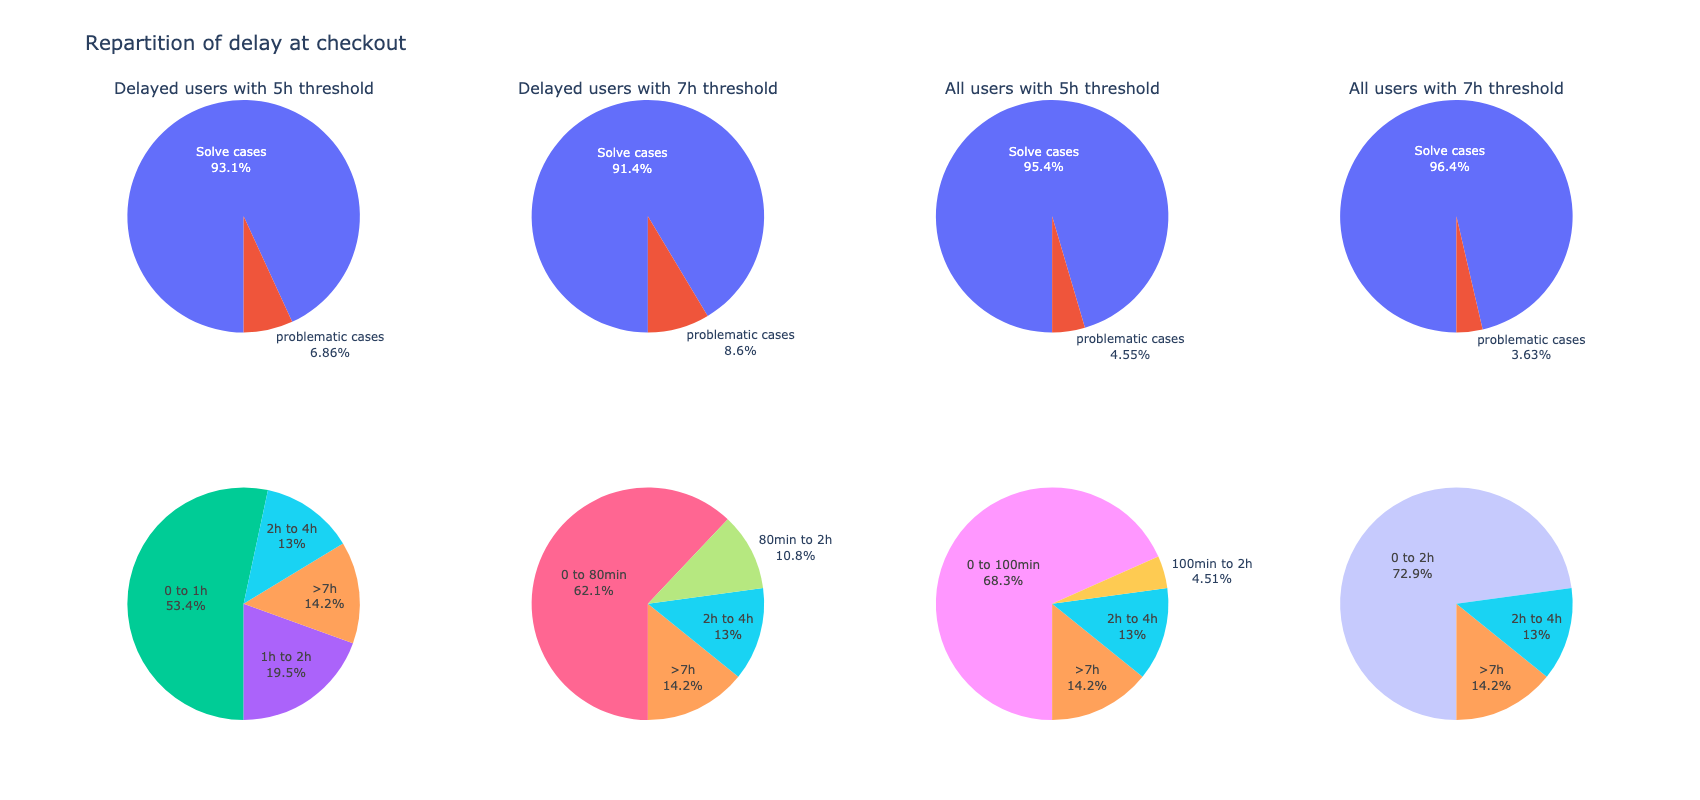

In [26]:
# Base on 5h threshold for delayed users only:
bins3 = [0,300,float('inf')]
labels3 = ['Solve cases', 'problematic cases']
positive_delay_bins3 = pd.cut(expected_threshold_positive_delay_df.delay_at_checkout_in_minutes, bins=bins3, labels=labels3)
section_fiveh_threshold_counts = positive_delay_bins3.value_counts()

#Base on 7h threshold for delayed users only:
bins2 = [0,420,float('inf')]
labels2 = ['Solve cases', 'problematic cases']
positive_delay_bins2 = pd.cut(expected_threshold_positive_delay_df.delay_at_checkout_in_minutes, bins=bins2, labels=labels2)
section_sevenh_threshold_counts = positive_delay_bins2.value_counts()

# Base on 5h threshold for delayed all only:
bins5 = [-float('inf'),300,float('inf')]
labels5 = ['Solve cases', 'problematic cases']
positive_delay_all_bins5 = pd.cut(expected_threshold_all_df.delay_at_checkout_in_minutes, bins=bins5, labels=labels5)
section_fiveh_threshold_all_counts = positive_delay_all_bins5.value_counts()

#Base on 7h threshold for delayed all only:
bins4 = [-float('inf'),420,float('inf')]
labels4 = ['Solve cases', 'problematic cases']
positive_delay_all_bins4 = pd.cut(expected_threshold_all_df.delay_at_checkout_in_minutes, bins=bins4, labels=labels4)
section_sevenh_threshold_all_counts = positive_delay_all_bins4.value_counts()

# Positive delays only
bins6 = [0, 60, 120, 240, float('inf')]
labels6 = ['0 to 1h', '1h to 2h', '2h to 4h','>7h']
delay_bins_positive6 = pd.cut(positive_delay_cleaned_df.delay_at_checkout_in_minutes, bins=bins6, labels=labels6)
section_counts_positive6 = delay_bins_positive6.value_counts()

bins7 = [0, 80, 120, 240, float('inf')]
labels7 = ['0 to 80min', '80min to 2h', '2h to 4h','>7h']
delay_bins_positive7 = pd.cut(positive_delay_cleaned_df.delay_at_checkout_in_minutes, bins=bins7, labels=labels7)
section_counts_positive7 = delay_bins_positive7.value_counts()

bins8 = [0, 100, 120, 240, float('inf')]
labels8 = ['0 to 100min', '100min to 2h', '2h to 4h','>7h']
delay_bins_positive8 = pd.cut(positive_delay_cleaned_df.delay_at_checkout_in_minutes, bins=bins8, labels=labels8)
section_counts_positive8 = delay_bins_positive8.value_counts()


bins9 = [0,120, 240, float('inf')]
labels9 = ['0 to 2h', '2h to 4h','>7h']
delay_bins_positive9 = pd.cut(positive_delay_cleaned_df.delay_at_checkout_in_minutes, bins=bins9, labels=labels9)
section_counts_positive9 = delay_bins_positive9.value_counts()

# Subplots & graphs

specs = [
    [{'type': 'domain'}, {'type': 'domain'},{'type': 'domain'},{'type': 'domain'}],
    [{'type': 'domain'}, {'type': 'domain'},{'type': 'domain'},{'type': 'domain'}]
]
fig2 = make_subplots(rows=2, cols=4, specs=specs, subplot_titles=['Delayed users with 5h threshold','Delayed users with 7h threshold',
                                                                  'All users with 5h threshold',
                                                                  'All users with 7h threshold',
                                                                  ''])
fig2.add_trace(go.Pie(labels=section_fiveh_threshold_counts.index, values=section_sevenh_threshold_counts, textinfo='label+percent',rotation=180),row=1, col=1)
fig2.add_trace(go.Pie(labels=section_sevenh_threshold_counts.index, values=section_fiveh_threshold_counts, textinfo='label+percent',rotation=180),row=1, col=2)
fig2.add_trace(go.Pie(labels=section_fiveh_threshold_all_counts.index, values=section_fiveh_threshold_all_counts, textinfo='label+percent',rotation=180),row=1, col=3)
fig2.add_trace(go.Pie(labels=section_sevenh_threshold_all_counts.index, values=section_sevenh_threshold_all_counts, textinfo='label+percent',rotation=180),row=1, col=4)

fig2.add_trace(go.Pie(labels=section_counts_positive6.index, values=section_counts_positive6, textinfo='label+percent',rotation=180),row=2, col=1)
fig2.add_trace(go.Pie(labels=section_counts_positive7.index, values=section_counts_positive7, textinfo='label+percent',rotation=180),row=2, col=2)
fig2.add_trace(go.Pie(labels=section_counts_positive8.index, values=section_counts_positive8, textinfo='label+percent',rotation=180),row=2, col=3)
fig2.add_trace(go.Pie(labels=section_counts_positive9.index, values=section_counts_positive9, textinfo='label+percent',rotation=180),row=2, col=4)
fig2.update_layout(title='Repartition of delay at checkout', title_font=dict(size=20), showlegend=False)
# fig2.show()

fig2.update_layout(width=1700,height=800)
# Save the figure as a static image in order to see it in github
pio.write_image(fig2, 'EDA_Go_graphs/Repartition of delay at checkout.png')
Image(filename='EDA_Go_graphs/Repartition of delay at checkout.png')

5h threshold : The problematic users respresent 6.86% among the delayed users and 4.55% with all users.

7h threshold : The problematic users respresent 8.6% among the delayed users and 3.63% with all users.

However it does not seems realistic to have such a huge threshold. Let's see with a threshold of 100min and 2h which seems to be more realistic.

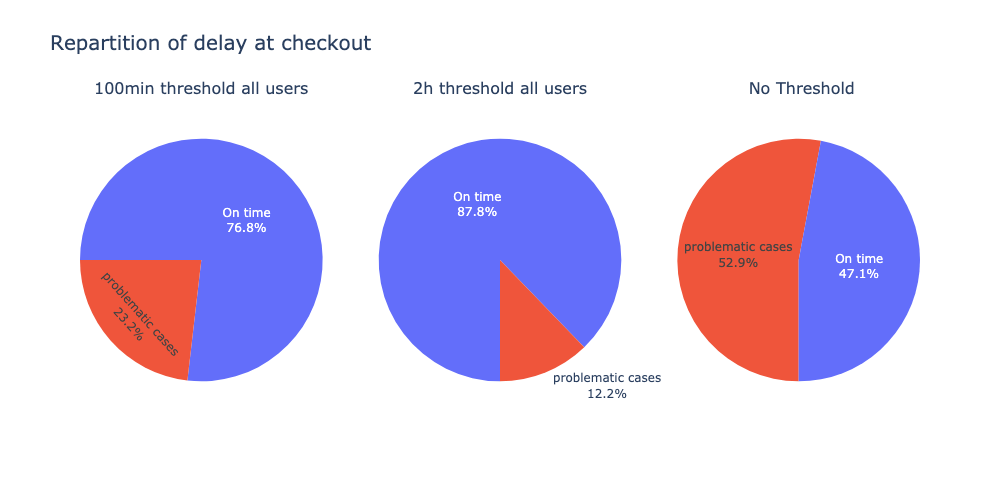

In [27]:
# Base on 100min threshold for all users only:
bins10 = [-float('inf'),60,float('inf')]
labels10 = ['On time', 'problematic cases']
positive_delay_bins10 = pd.cut(expected_threshold_all_df.delay_at_checkout_in_minutes, bins=bins10, labels=labels10)
section_100min_threshold_counts = positive_delay_bins10.value_counts()

# Base on 2h threshold for all users only:
bins11 = [-float('inf'),120,float('inf')]
labels11 = ['On time', 'problematic cases']
positive_delay_bins11 = pd.cut(expected_threshold_all_df.delay_at_checkout_in_minutes, bins=bins11, labels=labels11)
section_2h_threshold_counts = positive_delay_bins11.value_counts()

# No threshold:
bins12 = [-float('inf'),0,float('inf')]
labels12 = ['On time', 'problematic cases']
positive_delay_bins12 = pd.cut(expected_threshold_all_df.delay_at_checkout_in_minutes, bins=bins12, labels=labels12)
section_no_threshold_counts = positive_delay_bins12.value_counts()

specs = [
    [{'type': 'domain'}, {'type': 'domain'},{'type': 'domain'}]]
fig3 = make_subplots(rows=1, cols=3, specs=specs, subplot_titles=['100min threshold all users','2h threshold all users',' No Threshold'])
fig3.add_trace(go.Pie(labels=section_100min_threshold_counts.index, values=section_100min_threshold_counts, textinfo='label+percent',rotation=270),row=1, col=1)
fig3.add_trace(go.Pie(labels=section_2h_threshold_counts.index, values=section_2h_threshold_counts, textinfo='label+percent',rotation=180),row=1, col=2)
fig3.add_trace(go.Pie(labels=section_no_threshold_counts.index, values=section_no_threshold_counts, textinfo='label+percent',rotation=180),row=1, col=3)

fig3.update_layout(title='Repartition of delay at checkout', title_font=dict(size=20), showlegend=False)
# fig3.show()

fig3.update_layout(width=1000,height=500)
# Save the figure as a static image in order to see it in github
pio.write_image(fig3, 'EDA_Go_graphs/Repartition of delay at checkout.png')
Image(filename='EDA_Go_graphs/Repartition of delay at checkout.png')

Initially, we have 47.1% of the drivers are late for the next check-in. Having a threashold of 100 min or 2h will reduce by 38.6% or 40.7% the impact on the next user.

### Problematic cases ###

In [28]:
problematic_cases_100min_df=expected_threshold_all_df[expected_threshold_all_df['delay_at_checkout_in_minutes']>100]
checkin_type_100min_counts=problematic_cases_100min_df['checkin_type'].value_counts()
checkin_type_100min_counts

checkin_type
mobile     158
connect     59
Name: count, dtype: int64

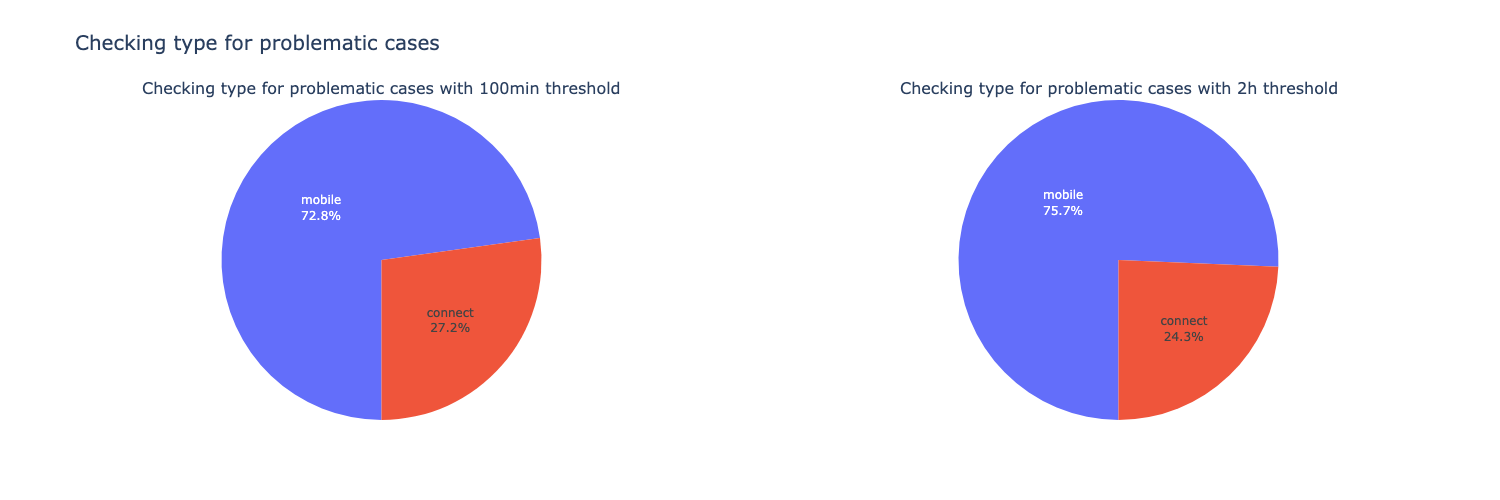

In [29]:
problematic_cases_100min_df=expected_threshold_all_df[expected_threshold_all_df['delay_at_checkout_in_minutes']>100]
checkin_type_100min_counts=problematic_cases_100min_df['checkin_type'].value_counts()

problematic_cases_2h_df=expected_threshold_all_df[expected_threshold_all_df['delay_at_checkout_in_minutes']>120]
checkin_type_2h_counts=problematic_cases_2h_df['checkin_type'].value_counts()

specs = [
    [{'type': 'domain'}, {'type': 'domain'}]]
fig4 = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=['Checking type for problematic cases with 100min threshold','Checking type for problematic cases with 2h threshold'])
fig4.add_trace(go.Pie(labels=checkin_type_100min_counts.index, values=checkin_type_100min_counts, textinfo='label+percent',rotation=180),row=1, col=1)
fig4.add_trace(go.Pie(labels=checkin_type_2h_counts.index, values=checkin_type_2h_counts, textinfo='label+percent',rotation=180),row=1, col=2)

fig4.update_layout(title='Checking type for problematic cases', title_font=dict(size=20), showlegend=False)
# fig4.show()

fig4.update_layout(width=1500,height=500)
# Save the figure as a static image in order to see it in github
pio.write_image(fig4, 'EDA_Go_graphs/Repartition of delay at checkout.png')
Image(filename='EDA_Go_graphs/Repartition of delay at checkout.png')


In [30]:
checkin_type_2h_counts

checkin_type
mobile     140
connect     45
Name: count, dtype: int64

In [31]:
delay_cleaned_df.columns

Index(['rental_id', 'car_id', 'checkin_type', 'delay_at_checkout_in_minutes',
       'previous_ended_rental_id',
       'time_delta_with_previous_rental_in_minutes'],
      dtype='object')

In [32]:
delay_cleaned_df['time_delta_with_previous_rental_in_minutes'].isnull().sum()

14831

# EDA PRICING #

In [33]:
pricing_df=pd.read_csv('/Users/kechok/Documents/Data_project/Bloc_5_PROJECT_GetAround-main/GetAround/EDA/get_around_pricing_project.csv')
pricing_df.head(20)

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131
6,6,Citroën,205219,145,diesel,grey,convertible,True,True,False,False,True,True,True,111
7,7,Citroën,115560,105,petrol,white,convertible,True,True,False,False,False,True,True,78
8,8,Peugeot,123886,125,petrol,black,convertible,True,False,False,False,False,True,True,79
9,9,Citroën,139541,135,diesel,white,convertible,False,False,False,False,True,False,True,132


In [34]:
pricing_df.shape

(4843, 15)

In [35]:
pricing_df.describe(include='all')

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [36]:
pricing_df.isnull().sum()

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [37]:
pricing_df.dtypes

Unnamed: 0                    int64
model_key                    object
mileage                       int64
engine_power                  int64
fuel                         object
paint_color                  object
car_type                     object
private_parking_available      bool
has_gps                        bool
has_air_conditioning           bool
automatic_car                  bool
has_getaround_connect          bool
has_speed_regulator            bool
winter_tires                   bool
rental_price_per_day          int64
dtype: object

In [38]:
pricing_df['rental_price_per_day'].mean()

121.21453644435267

In [39]:
connect_count=pricing_df['has_getaround_connect'].value_counts()
percentage = connect_count /len(pricing_df)
connect_df= pd.DataFrame({'Count': connect_count, 'Percentage/Repartition': percentage})

connect_df

,Count,Percentage/Repartition
has_getaround_connect,,
False,2613,0.539542
True,2230,0.460458


In [40]:
getaround_connect_df=pricing_df.groupby('has_getaround_connect').agg({'rental_price_per_day': 'sum'})
getaround_connect_df['Count']=pricing_df['has_getaround_connect'].value_counts()
getaround_connect_df['Percentage/Repartition']=getaround_connect_df['Count']/len(pricing_df)
getaround_connect_df

,rental_price_per_day,Count,Percentage/Repartition
has_getaround_connect,,,
False,290929,2613,0.539542
True,296113,2230,0.460458


In [41]:
checkin_type_2h_counts

checkin_type
mobile     140
connect     45
Name: count, dtype: int64

In [42]:
pricing_df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [43]:
numerical_df=pd.DataFrame()
categorical_df=pd.DataFrame()

for column, dtype in pricing_df.dtypes.items():
    if dtype == 'int64':
        numerical_df[column] = pricing_df[column]
    else:
        categorical_df[column] = pricing_df[column]
        categorical_df['rental_price_per_day']=pricing_df['rental_price_per_day']


In [44]:
categorical_df['rental_price_per_day']=pricing_df['rental_price_per_day']

In [45]:
categorical_df.head()

,model_key,rental_price_per_day,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,Citroën,106,diesel,black,convertible,True,True,False,False,True,True,True
1,Citroën,264,petrol,grey,convertible,True,True,False,False,False,True,True
2,Citroën,101,diesel,white,convertible,False,False,False,False,True,False,True
3,Citroën,158,diesel,red,convertible,True,True,False,False,True,True,True
4,Citroën,183,diesel,silver,convertible,True,True,False,False,False,True,True


In [46]:
for column_cat in categorical_df.columns:
    # Calculate average rental price per day for each category
    average_price = categorical_df.groupby(column_cat)['rental_price_per_day'].mean()
    # Create bar chart for each category
    if column_cat != 'rental_price_per_day': 
        average_price_sorted = average_price.sort_values(ascending=False)
        fig = px.bar(average_price_sorted, x=average_price_sorted.index, y=average_price_sorted.values, title=f'Average Rental Price per Day by {column_cat}')
        fig.show()

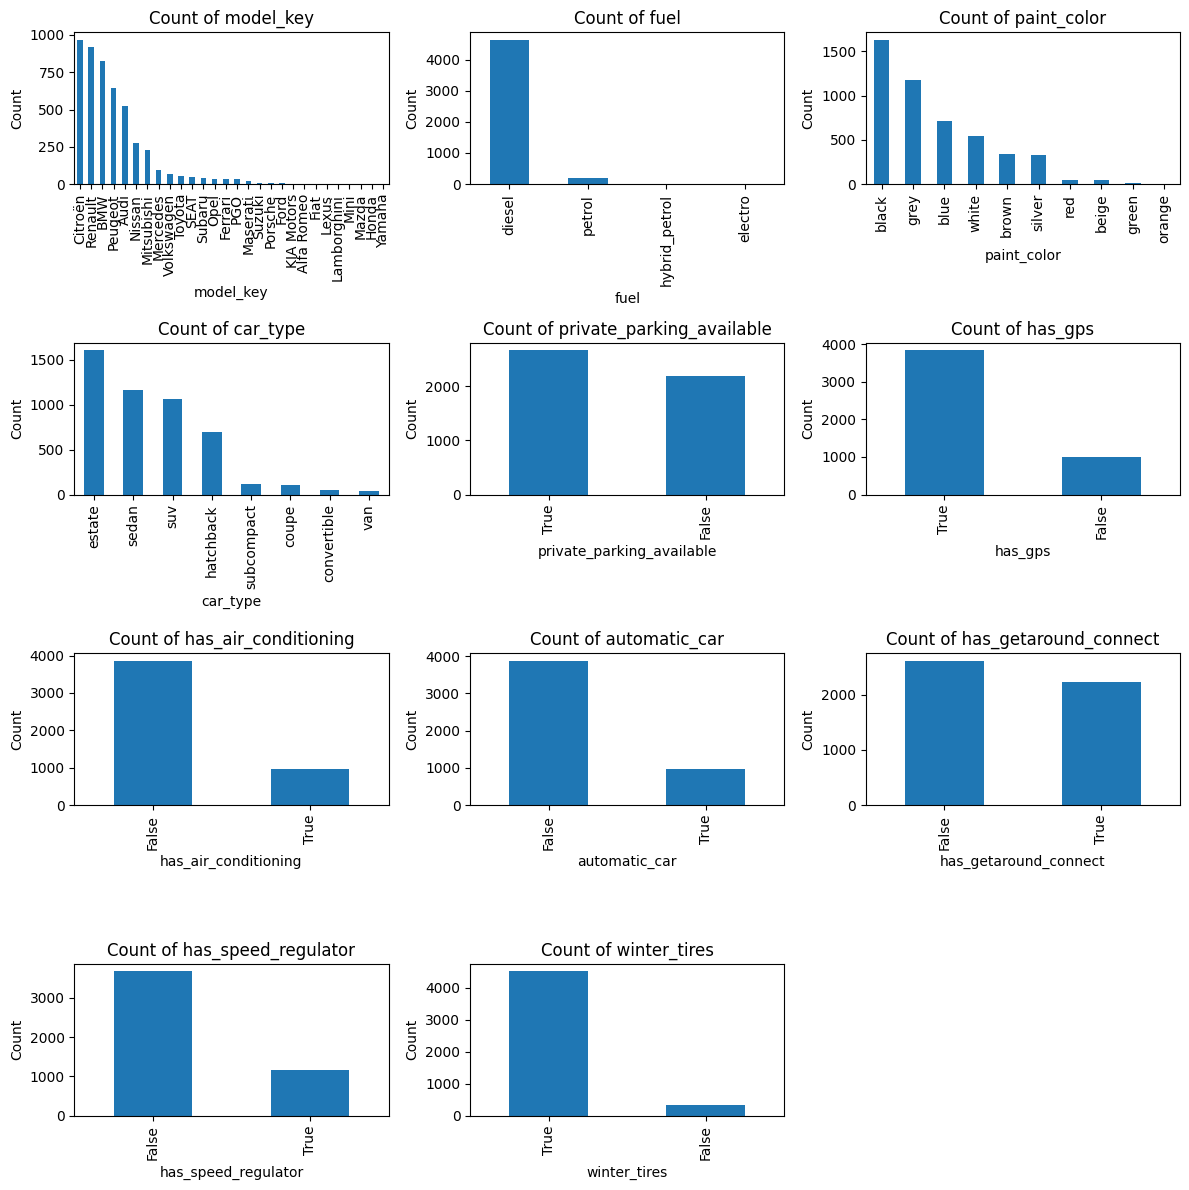

In [47]:
count_categorical = categorical_df.drop(columns=['rental_price_per_day'])
fig, axes = plt.subplots(4, 3, figsize=(12, 4*3))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over the categorical variables and create bar plots
for i, column in enumerate(count_categorical.columns):
    ax = axes[i]
    counts = count_categorical[column].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f"Count of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")

# Hide unused subplots if any
for j in range(11, 12):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [48]:
thresholds=[30,60,90,120,200]
duration_rental_in_hour=24
average_price_rental_per_day=pricing_df['rental_price_per_day'].mean()
average_hourly_price = average_price_rental_per_day / duration_rental_in_hour
threshold_df=[]
columns=['Threshold', 'Number of Rentals Affected', 'Rental duration',
         'Average Price per Day', 'Average Hourly Price','Average potential revenue lost affected in euros']


for threshold in thresholds:
    affected_rentals_df = expected_threshold_all_df[(expected_threshold_all_df['delay_at_checkout_in_minutes'] < threshold) & (expected_threshold_all_df['delay_at_checkout_in_minutes'] >0 )]
    affected_rentals_df['duration_hours'] = affected_rentals_df['delay_at_checkout_in_minutes'] / 60
    affected_rentals_df['potential_revenue_affected'] = affected_rentals_df['duration_hours'] * average_hourly_price

    average_potential_revenue_affected = affected_rentals_df['potential_revenue_affected'].mean()
    affected_rentals_df['percentage_lost'] = round((100 * affected_rentals_df['potential_revenue_affected']) / average_price_rental_per_day)

    # Define the data for the new row
    data = {'Threshold': threshold,
            'Number of Rentals Affected': len(affected_rentals_df),
            'Rental duration': duration_rental_in_hour,
            'Average Price per Day': round(average_price_rental_per_day),
            'Average Hourly Price': round(average_hourly_price),
            'Average potential revenue lost affected in euros': round(average_potential_revenue_affected,2)}
    threshold_df.append(data)

threshold_df = pd.DataFrame(threshold_df,columns=columns)
threshold_df




,Threshold,Number of Rentals Affected,Rental duration,Average Price per Day,Average Hourly Price,Average potential revenue lost affected in euros
0,30,260,24,121,5,1.07
1,60,448,24,121,5,2.16
2,90,559,24,121,5,2.96
3,120,616,24,121,5,3.49
4,200,688,24,121,5,4.45
